# Result Analysis

In [9]:
from matplotlib import pyplot as plt
import json

The accuracy is f{scores[-1]}


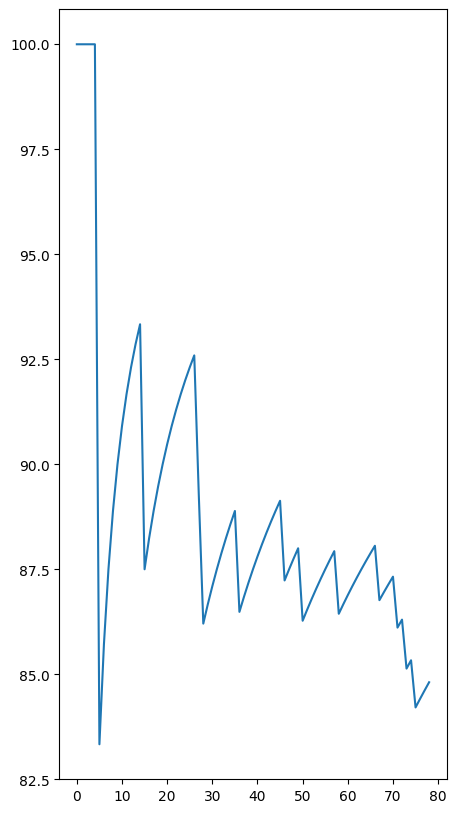

In [19]:
def train_curve(path):
    with open(path, 'r', encoding="utf-8") as f:
        rawdata = f.readlines()
    all_labels = json.loads(rawdata[1].strip())
    all_predictions =  json.loads(rawdata[5].strip())

    scores=[]
    for i in range(1,len(all_predictions)):
        labels = all_labels[:i]
        predictions = all_predictions[:i]
        matching_count = sum(1 for i, j in zip(labels, predictions) if i == j)
        total_count = len(labels)
        score = (matching_count / total_count) * 100
        scores.append(score)
    print("The accuracy is f{scores[-1]}")
    plt.figure(figsize=(5, 10))
    plt.plot(scores)
    plt.show()

train_curve("../out/lemma_twitter_score")

In [20]:
def stats(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    num_items = len(data)
    labels = []
    predictions = []
    zero_shot_predictions = []
    total_correct = 0
    total_incorrect = 0
    zero_shot_correct = 0
    zero_shot_incorrect = 0
    total_modified = 0
    total_modified_0_to_1 = 0
    total_modified_0_to_1_correct = 0
    total_modified_0_to_1_incorrect = 0
    total_modified_1_to_0 = 0
    total_modified_1_to_0_correct = 0
    total_modified_1_to_0_incorrect = 0
    total_unmodified = 0
    total_modified_correct = 0
    total_modified_incorrect = 0

    for item in data:
        labels.append(item['label'])
        predictions.append(item['prediction'])
        zero_shot_predictions.append(item['direct'])
        if item['label'] == item['direct']:
            if item['prediction'] != item['label']:
                total_incorrect += 1
                zero_shot_correct += 1
                total_modified += 1
                if item['direct'] == 0:
                    total_modified_0_to_1 += 1
                    total_modified_0_to_1_incorrect += 1
                else:
                    total_modified_1_to_0 += 1
                    total_modified_1_to_0_incorrect += 1
                total_modified_incorrect += 1
            else:
                total_correct += 1
                zero_shot_correct += 1
                total_unmodified += 1
        else:
            if item['prediction'] == item['label']:
                total_correct += 1
                zero_shot_incorrect += 1
                total_modified += 1
                if item['direct'] == 0:
                    total_modified_0_to_1 += 1
                    total_modified_0_to_1_correct += 1
                else:
                    total_modified_1_to_0 += 1
                    total_modified_1_to_0_correct += 1
                total_modified_correct += 1
            else:
                total_incorrect += 1
                zero_shot_incorrect += 1
                total_unmodified += 1

    print('Total items: {}'.format(num_items))
    print('Total correct: {}'.format(total_correct))
    print('Total incorrect: {}'.format(total_incorrect))
    print('Total Accuracy: {}'.format(total_correct / num_items))
    print('Zero-shot correct: {}'.format(zero_shot_correct))
    print('Zero-shot incorrect: {}'.format(zero_shot_incorrect))
    print('Zero-shot Accuracy: {}'.format(zero_shot_correct / num_items))
    print(
        'Total modified: {}\n\t| 0 -> 1: {}\n\t\t| Correct: {}\n\t\t| Incorrect : {}\n\t| 1-> 0: {}\n\t\t| Correct: {}\n\t\t| Incorrect : {}'.format(
            total_modified, total_modified_0_to_1, total_modified_0_to_1_correct, total_modified_0_to_1_incorrect,
            total_modified_1_to_0, total_modified_1_to_0_correct, total_modified_1_to_0_incorrect))
    print('Total unmodified: {}'.format(total_unmodified))
    print('Total modified correct: {}'.format(total_modified_correct))
    print('Total modified incorrect: {}'.format(total_modified_incorrect))

stats("../out/lemma_twitter_output.json")

Total items: 80
Total correct: 68
Total incorrect: 12
Total Accuracy: 0.85
Zero-shot correct: 60
Zero-shot incorrect: 20
Zero-shot Accuracy: 0.75
Total modified: 12
	| 0 -> 1: 9
		| Correct: 8
		| Incorrect : 1
	| 1-> 0: 3
		| Correct: 2
		| Incorrect : 1
Total unmodified: 68
Total modified correct: 10
Total modified incorrect: 2


In [5]:

def get_badcases():
    # This script will find the new badcases in lemma_twitter_output and add them to badcase.json
    # It will not overwrite the existing badcases, just adding new ones.
    with open("../out/lemma_twitter_output.json", "r",encoding="utf-8") as f:
        outputs = json.loads(f.read())

    with open("../data/badcase.json","r",encoding="utf-8") as f:
        results = json.loads(f.read())
    posts_set = set([result["original_post"] for result in results])

    for output in outputs:
        if (output["label"] != output["prediction"]) and (output["text"] not in posts_set):
            output["original_post"] = output["text"]
            output.pop("text",None)
            results.append(output)

    with open("../data/badcase.json","w", encoding="utf-8") as f:
        f.write(json.dumps(results))
    print("New badcases added in data/badcase.json")

get_badcases()

New badcases added in data/badcase.json
